
# Employee Attrition

For any company, employee attrition is a big challenge. It is easier to retain employees than recruit employees in the open market - especially if you are a mid market company.

Ms ABC, head of HR of a mid market company XYZ has hired you as a data scientist to help the team out by predicting which of the employees exhibit potential risk to attrite in the next month.

Her team has diligently gathered data and has shared them with you as a csv. 
The dataset has the following columns

- Satisfaction Level
- Last evaluation
- Number of projects
- Average monthly hours
- Time spent at the company
- Whether they have had a work accident
- Whether they have had a promotion in the last 5 years
- Departments
- Salary
- Whether the employee has left - This is the target variable to be predicted

Can you help ABC and her team with this problem?

## Load the libraries

In [2]:
#Load the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#Default Variables
%matplotlib inline
plt.rcParams['figure.figsize'] = (8,6)
plt.style.use('ggplot')
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [12]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [51]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [52]:
from sklearn.model_selection import StratifiedKFold

In [65]:
import seaborn as sns

In [72]:
from sklearn.externals import joblib
from firefly.client import Client

### ** Frame -  find probability of attrition **

Discuss

### ** Acquire - load historical data **

In [6]:
attrition = pd.read_csv("../data/employee-attrition.csv")

In [7]:
attrition.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


### **Refine - check for NAs and outliers**


In [9]:
attrition.isnull().head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,promotion_last_5years,department,salary,left
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False


In [10]:
attrition.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
time_spend_company       0
work_accident            0
promotion_last_5years    0
department               0
salary                   0
left                     0
dtype: int64

### ** Transform - encoding categorical variables**

In [11]:
attrition.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_monthly_hours      int64
time_spend_company         int64
work_accident              int64
promotion_last_5years      int64
department                object
salary                    object
left                       int64
dtype: object

In [17]:
attrition[["department", "salary"]] = attrition[["department", "salary"]].apply(LabelEncoder().fit_transform)

In [18]:
attrition.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_monthly_hours      int64
time_spend_company         int64
work_accident              int64
promotion_last_5years      int64
department                 int64
salary                     int64
left                       int64
dtype: object

### **Explore - shape of data**

**left**

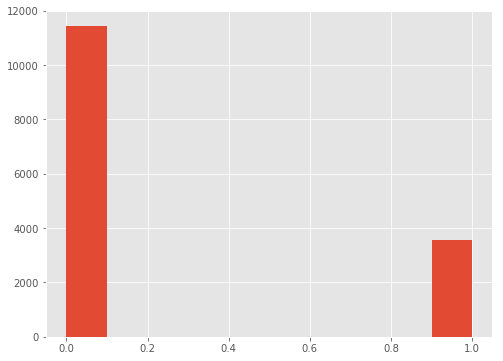

In [21]:
attrition.left.hist();

**number_project, left**

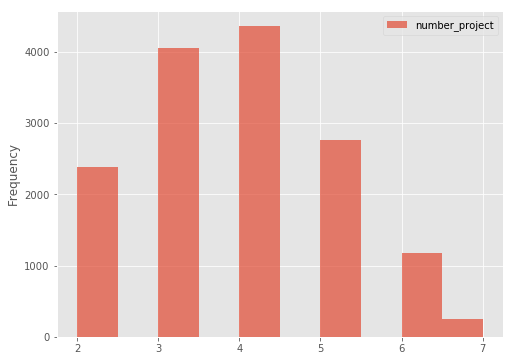

In [29]:
attrition.plot.hist(x='left', y='number_project', alpha=0.7);

**satisfaction level, average monthly hours, left**

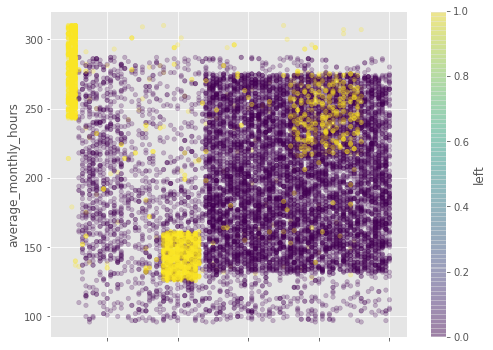

In [32]:
attrition.plot.scatter(x='satisfaction_level', y='average_monthly_hours', c='left', alpha=0.25, cmap='viridis');

In [33]:
attrition.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'work_accident',
       'promotion_last_5years', 'department', 'salary', 'left'],
      dtype='object')

**salary, number_project, left**

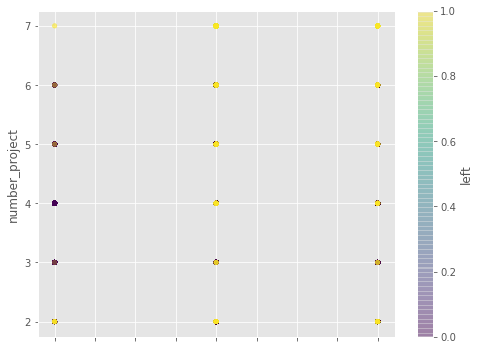

In [36]:
attrition.plot.scatter(x='salary', y='number_project', c='left', alpha=0.25, cmap='viridis');

### ** Model - Build a classifier **

**Decision Tree - 2 models (with `max_depth`=3 and `max_depth`=None)**

In [41]:
#max depth = 3
model_dt_1 = DecisionTreeClassifier(max_depth=3)
model_dt_1.fit(attrition.iloc[:,:9], attrition.iloc[:, 9])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [43]:
#max depth = None
model_dt_2 = DecisionTreeClassifier(max_depth=None)
model_dt_2.fit(attrition.iloc[:,:9], attrition.iloc[:, 9])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

**Random Forest - 2 models (with `n_estimators`=10 and with `oob`)**

In [44]:
#n_estimators = 10
model_rf_1 = RandomForestClassifier(n_estimators=10)
model_rf_1.fit(attrition.iloc[:,:9], attrition.iloc[:, 9])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [49]:
#n_estimators = 10 and oob = true
model_rf_2 = RandomForestClassifier(n_estimators=10, oob_score=True)
model_rf_2.fit(attrition.iloc[:,:9], attrition.iloc[:, 9])

In [50]:
model_rf_2.oob_score_

0.98519901326755122

**Model Selection - AUC and cross-validation**

In [56]:
X = attrition.iloc[:,:9]
y = attrition.iloc[:,9]

In [58]:
clf_dt = DecisionTreeClassifier(max_depth=5)

In [59]:
def pred_df(clf, X, y):
    clf = clf.fit(X,y)
    y_pred = clf.predict(X)
    y_proba = clf.predict_proba(X)[:,1]
    pred_df = pd.DataFrame({"actual": np.array(y), "predicted": y_pred, "probability": y_proba})
    return pred_df

In [60]:
pred_dt = pred_df(clf_dt, X,y)
pred_dt.head()

,actual,predicted,probability
0,1,1,0.98
1,1,1,0.92
2,1,1,1.00
3,1,1,0.92
4,1,1,0.98


In [61]:
pd.crosstab(pred_dt.predicted, pred_dt.actual)

actual,0,1
predicted,,
0,11317,252
1,111,3319


In [62]:
confusion_matrix(pred_dt.predicted, pred_dt.actual)

array([[11317,   252],
       [  111,  3319]])

In [63]:
def plot_prediction(pred_df):
    pred_df_0 = pred_df[pred_df.actual == 0]
    pred_df_1 = pred_df[pred_df.actual == 1]
    sns.kdeplot(pred_df_0.probability, shade=True, label="no default")
    sns.kdeplot(pred_df_1.probability, shade=True, label="default")    

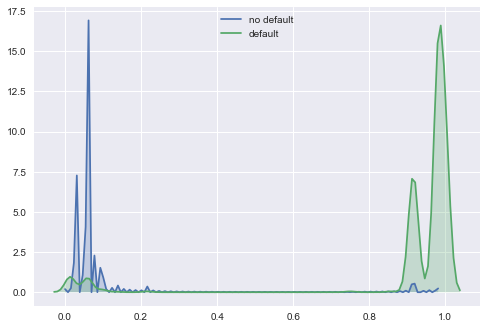

In [66]:
plot_prediction(pred_dt)

In [67]:
def plot_roc_auc(pred_df):
    fpr, tpr, thresholds = roc_curve(pred_df.actual, pred_df.probability)
    auc_score = roc_auc_score(pred_df.actual,pred_df.probability)
    plt.plot(fpr, tpr, label='AUC = %0.2f' % auc_score)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    return print("AUC = %0.2f" % auc_score)

AUC = 0.98


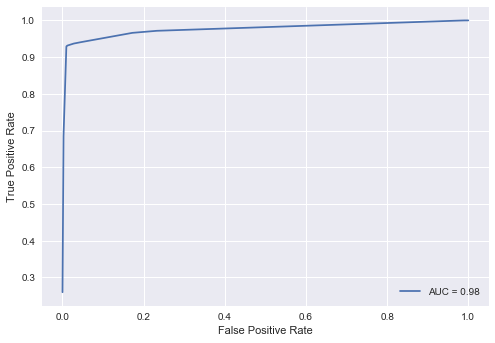

In [68]:
plot_roc_auc(pred_dt)

In [69]:
def cross_val(clf, k):
    
    # Instantiate stratified k fold.
    kf = StratifiedKFold(n_splits=k)
    
    # Let's use an array to store the results of cross-validation
    kfold_auc_score = []

    # Run kfold CV
    for train_index, test_index in kf.split(X,y):
        clf = clf.fit(X.iloc[train_index], y.iloc[train_index])
        proba = clf.predict_proba(X.iloc[test_index])[:,1]
        auc_score = roc_auc_score(y.iloc[test_index],proba)
        print(auc_score)
        kfold_auc_score.append(auc_score)
    
    print("Mean K Fold CV:", np.mean(kfold_auc_score))
 

In [70]:
cross_val(clf_dt, 3)

0.976886469166
0.967937282553
0.970398393014
Mean K Fold CV: 0.971740714911


### ** Build - the ML API **

In [73]:
joblib.dump(clf_dt, "clf.pkl")

['clf.pkl']

In [75]:
%%file simple.py
import numpy as np
from sklearn.externals import joblib
model = joblib.load("clf.pkl")

def predict(satisfaction_level, last_evaluation, number_project,
           average_monthly_hours, time_spend_company, work_accident,
           promotion_last_5years, department, salary):
    
    features = [satisfaction_level, last_evaluation, number_project,
           average_monthly_hours, time_spend_company, work_accident,
           promotion_last_5years, department, salary]
    prob0, prob1 = model.predict_proba([features])[0]
    return prob1

Writing simple.py


### ** Deploy - the ML API **

Run the following command in your terminal

    $ cd employee-attrition/notebook
$ firefly simple.predict

### ** Interact - get prediction using API**

In [80]:
simple = Client("http://127.0.0.1:8000")
simple.predict(satisfaction_level=0.38, 
               last_evaluation=0.53, 
               number_project=2,
           average_monthly_hours=160, 
               time_spend_company=3, 
               work_accident=0,
           promotion_last_5years=0, 
               department=7, 
               salary=1)


0.978743961352657

In [81]:
#The employee has very high chance of attrition ! 